In [104]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
# Importing modul

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mnso
import random

from sklearn.impute import KNNImputer, SimpleImputer
from scipy.stats import skew,skewtest,spearmanr,pearsonr,normaltest
from sklearn.preprocessing import RobustScaler,OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# **Data Understanding**

In [106]:
# Load Dataset

df = pd.read_csv('Data_Observation.csv',sep=';')
df

,Slope,NDVI,Volume
0,40.313,0.740,4.160
1,40.680,0.741,2.922
2,14.837,0.332,0.000
3,8.904,0.734,0.000
4,23.281,0.616,1.682
5,10.655,0.639,1.854
6,12.656,0.497,0.395
7,2.988,0.191,0.000
8,1.387,0.628,0.132
9,32.786,0.758,5.046


In [107]:
# Checking the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Slope   55 non-null     float64
 1   NDVI    55 non-null     float64
 2   Volume  55 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


## 1. Data Description

In [108]:
# Feature in dataset

# Slope : Landslope, units in percentage
# NDVI (Normalize Difference Vegetation Index) : Vegetation index, range 0-1, higher value means thicker vegetation canopy
# Volume : Stand volume, units in m^3

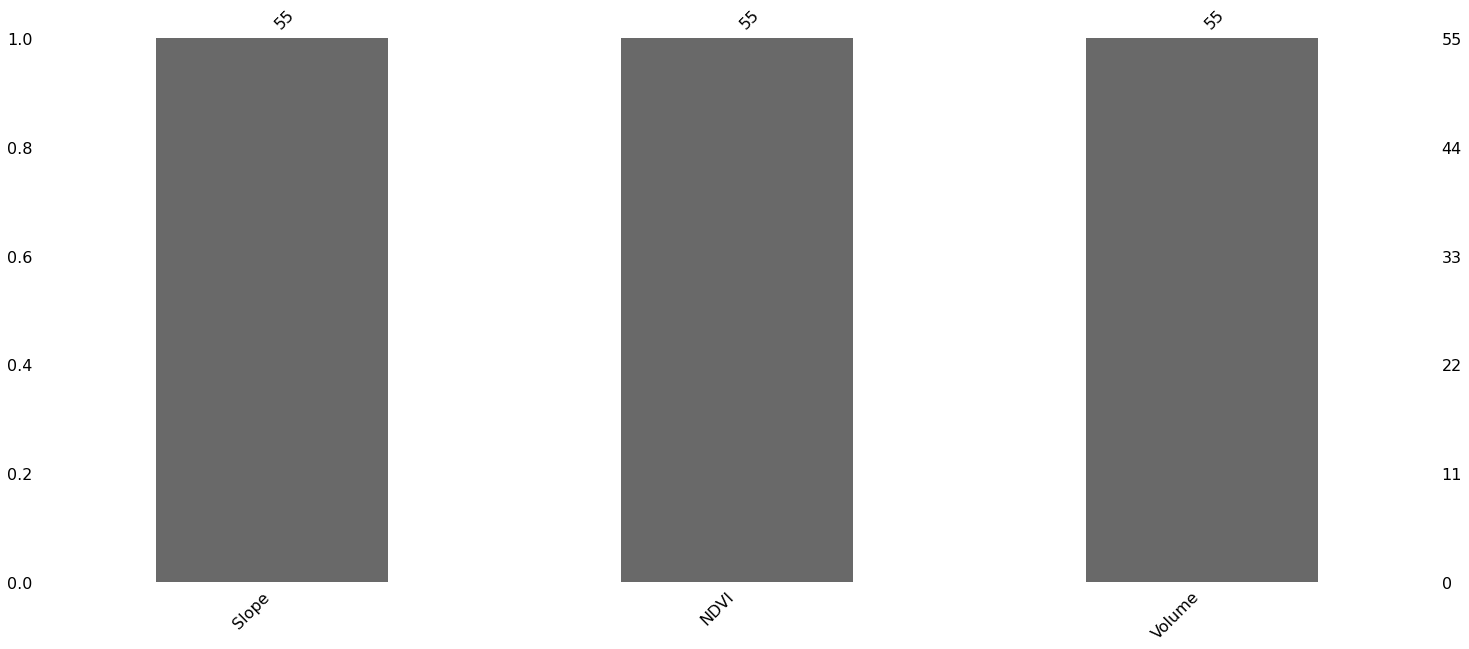

In [109]:
# Checking the missing value

mnso.bar(df)

In [110]:
# Checking the missing value in percentage

df.isna().sum()/len(df)

Slope     0.0
NDVI      0.0
Volume    0.0
dtype: float64

In [111]:
# Showing the dataset descriptive statistic 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Slope,55.0,20.421709,15.136789,1.387,10.1725,17.089,26.9115,74.035
NDVI,55.0,0.639964,0.160197,0.125,0.6010,0.710,0.7405,0.806
Volume,55.0,1.380291,1.527282,0.000,0.2255,0.876,1.7860,5.203


## 2. Exploratory Data Analysis


Iterasi ke- 1
Kolom :  Slope


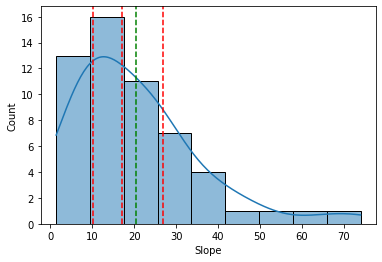

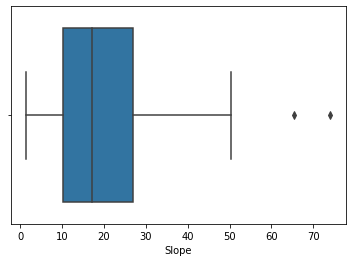


Skew Value :  1.4349674188215156
Skew Test Value :  SkewtestResult(statistic=3.8567628218787586, pvalue=0.0001148985490995366)
count    55.000000
mean     20.421709
std      15.136789
min       1.387000
25%      10.172500
50%      17.089000
75%      26.911500
max      74.035000
Name: Slope, dtype: float64

nilai max di luar outlier = 50.295
nilai min di luar outlier = 1.387
jumlah outlier:2
outlier:
[65.349, 74.035]


Iterasi ke- 2
Kolom :  NDVI


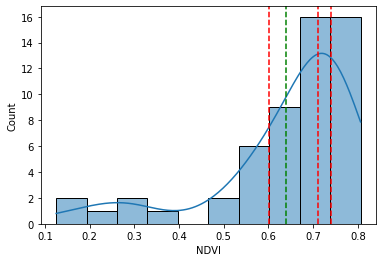

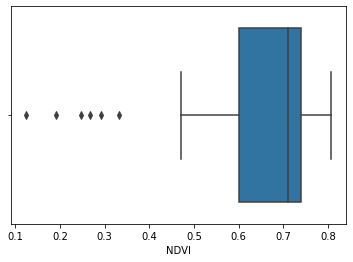


Skew Value :  -1.7484300941791064
Skew Test Value :  SkewtestResult(statistic=-4.408055399620274, pvalue=1.0430286919242515e-05)
count    55.000000
mean      0.639964
std       0.160197
min       0.125000
25%       0.601000
50%       0.710000
75%       0.740500
max       0.806000
Name: NDVI, dtype: float64

nilai max di luar outlier = 0.806
nilai min di luar outlier = 0.471
jumlah outlier:6
outlier:
[0.332, 0.191, 0.125, 0.248, 0.291, 0.267]


Iterasi ke- 3
Kolom :  Volume


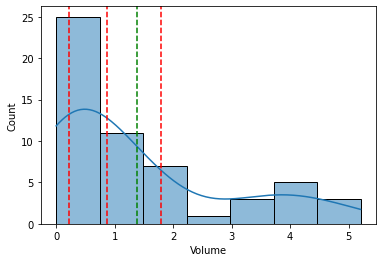

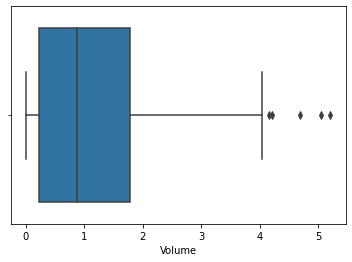


Skew Value :  1.1306318777771294
Skew Test Value :  SkewtestResult(statistic=3.2370384607079377, pvalue=0.0012077713286442946)
count    55.000000
mean      1.380291
std       1.527282
min       0.000000
25%       0.225500
50%       0.876000
75%       1.786000
max       5.203000
Name: Volume, dtype: float64

nilai max di luar outlier = 4.039
nilai min di luar outlier = 0.0
jumlah outlier:5
outlier:
[4.16, 5.046, 4.682, 4.209, 5.203]



In [112]:
# Creating the list for dataset feature names
list_kontinu = list(df.columns)
df_num = df.select_dtypes('number')

# Creating loop
iter = 1
for i in list_kontinu:
  print()
  print('Iterasi ke-',iter)
  print('Kolom : ',i)
  sns.histplot(df_num[i],kde=True)
  plt.axvline(np.mean(df_num[i]),c='green',linestyle='--')
  plt.axvline(np.percentile(df_num[i],25),c='red',linestyle='--')
  plt.axvline(np.percentile(df_num[i],50),c='red',linestyle='--')
  plt.axvline(np.percentile(df_num[i],75),c='red',linestyle='--')
  plt.show()
  sns.boxplot(data=df_num, x=df_num[i])
  plt.show()

  print()
  print('Skew Value : ',skew(df_num[i]))
  print('Skew Test Value : ',skewtest(df_num[i]))
  print(df_num[i].describe())
  
  print()
  Q1 = np.percentile(df_num[i],25)
  Q2 = np.percentile(df_num[i],50)
  Q3 = np.percentile(df_num[i],75)
  IQR = Q3-Q1

  upper_f = Q3 + 1.5 * IQR
  lower_f = Q1 - 1.5 * IQR

  upper_w = np.max(df_num[df_num[i] <= upper_f][i])
  lower_w = np.min(df_num[df_num[i] >= lower_f][i])
  outlier = list(df_num[(df_num[i] < lower_w) | (df_num[i] > upper_f)][i])

  print('nilai max di luar outlier = {}'.format(upper_w))
  print('nilai min di luar outlier = {}'.format(lower_w))
  print('jumlah outlier:{}'.format(len(outlier)))
  print('outlier:')
  print(outlier)
  iter+=1
  print()

In [113]:
# The slope and volume have the right skewed distribution but in contrast the NDVI has the left skewed distribution

# **Data Preparation**

## Data Cleaning and Handling Missing Value

In [114]:
# There was no missing value in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Slope   55 non-null     float64
 1   NDVI    55 non-null     float64
 2   Volume  55 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


# **Feature Engineering**

## 1. Feature Transformation

In [115]:
# Spliting the data for X and Y variable

X = df.drop(['Volume'],axis=1)
Y = df['Volume']

In [116]:
# Executing the train test split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [117]:
# Melihat ukuran dataset dari train test

print('X train :',X_train.shape)
print('y train :',y_train.shape)
print('X test :',X_test.shape)
print('y test :',y_test.shape)

X train : (44, 2)
y train : (44,)
X test : (11, 2)
y test : (11,)


In [118]:
# Scaling the data train

rs = RobustScaler()
X_train_sc = pd.DataFrame(rs.fit_transform(X_train),columns =rs.get_feature_names_out(X_train.columns))
X_train_sc

,Slope,NDVI
0,-0.367599,0.177258
1,0.271364,0.123746
2,-0.722335,0.377926
3,-0.759048,-0.531773
4,-0.586158,-3.896321
5,-0.172213,-1.408027
6,0.381086,-0.612040
7,1.593918,0.056856
8,3.024111,0.030100
9,0.408165,-0.772575


In [119]:
# Scaling the data test

X_test_sc = pd.DataFrame(rs.transform(X_test),columns =rs.get_feature_names_out(X_test.columns))
X_test_sc

,Slope,NDVI
0,0.465813,-0.518395
1,-0.276415,-0.458194
2,0.307192,-0.785953
3,0.197469,0.190635
4,0.058637,0.016722
5,-0.126803,-0.872910
6,-0.238348,0.063545
7,0.397855,0.384615
8,-0.260845,0.264214
9,0.587669,0.237458


## 2. Feature Selection

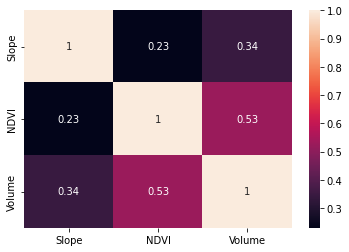

In [120]:
# Looking at the correlation of each variable

corr = df.corr(method='spearman')
sns.heatmap(corr,annot=True)

# Modelling

In [121]:
# Declaring the custom function for checking every regression metrics

def regrp(estimator, x, y, label):
    y_pred = estimator.predict(x)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    mae = mean_absolute_error(y, y_pred)
    met_df = pd.DataFrame({'r2':r2,
             'mse':mse,
             'rmse':rmse,
             'mae':mae}, index = [label])
    return met_df

def merg(a):
    b = pd.DataFrame()
    for x in a:
        b = pd.concat([b,x], axis=0)
    print(b)

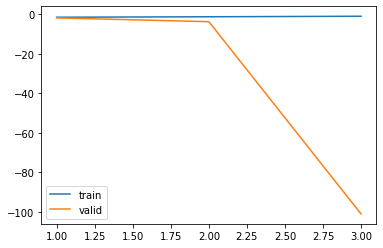

In [122]:
# Tunning degree parameter before declares the linear model

param = np.arange(1,4,1)
train=[]
valid=[]
a=[]

for x in param:
  pipeline = make_pipeline(PolynomialFeatures(degree=x, include_bias=False),LinearRegression())
  result=cross_validate(pipeline,
                          X_train_sc,
                          y_train,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score = True)
  train.append(result['train_score'].mean())
  valid.append(result['test_score'].mean())
  a.append(x)

sns.lineplot(x=a,y=train,label='train')
sns.lineplot(x=a,y=valid,label='valid')
plt.show()

In [123]:
# Declaring the linear and non-linear models

linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
ada = AdaBoostRegressor(random_state=42)
xg = XGBRegressor(random_state=42)

In [124]:
# Fitting the models

linear.fit(X_train_sc,y_train)
lasso.fit(X_train_sc,y_train)
ridge.fit(X_train_sc,y_train)
elastic.fit(X_train_sc,y_train)

dt.fit(X_train_sc,y_train)
rf.fit(X_train_sc,y_train)
ada.fit(X_train_sc,y_train)
xg.fit(X_train_sc,y_train)

[12:12:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

In [163]:
# Checking the model performance using custom function

merg([regrp(linear,X_train_sc,y_train,'Train_linear'),
      regrp(linear,X_test_sc,y_test,'Test_linear'),
      regrp(ridge,X_train_sc,y_train,'Train_ridge'),
      regrp(ridge,X_test_sc,y_test,'Test_ridge'),
      regrp(lasso,X_train_sc,y_train,'Train_lasso'),
      regrp(lasso,X_test_sc,y_test,'Test_lasso'),
      regrp(elastic,X_train_sc,y_train,'Train_elastic'),
      regrp(elastic,X_test_sc,y_test,'Test_elastic'),
      regrp(dt,X_train_sc,y_train,'Train_dt'),
      regrp(dt,X_test_sc,y_test,'Test_dt'),
      regrp(rf,X_train_sc,y_train,'Train_rf'),
      regrp(rf,X_test_sc,y_test,'Test_rf'),
      regrp(ada,X_train_sc,y_train,'Train_ada'),
      regrp(ada,X_test_sc,y_test,'Test_ada'),
      regrp(xg,X_train_sc,y_train,'xg_train'),
      regrp(xg,X_test_sc,y_test,'xg_test')
            ])

                     r2       mse      rmse       mae
Train_linear   0.314003  1.593302  1.262261  1.013728
Test_linear    0.157589  1.795255  1.339871  1.241614
Train_ridge    0.313882  1.593583  1.262372  1.014788
Test_ridge     0.155286  1.800163  1.341702  1.242603
Train_lasso    0.000000  2.322607  1.524010  1.233463
Test_lasso    -0.017229  2.167807  1.472347  1.254552
Train_elastic  0.100482  2.089228  1.445416  1.173127
Test_elastic   0.021650  2.084954  1.443937  1.268575
Train_dt       1.000000  0.000000  0.000000  0.000000
Test_dt       -1.321790  4.947945  2.224398  1.660455
Train_rf       0.879734  0.279330  0.528517  0.386457
Test_rf       -0.128804  2.405584  1.550995  1.241767
Train_ada      0.883742  0.270023  0.519637  0.449820
Test_ada      -0.502145  3.201207  1.789192  1.361558
xg_train       0.969243  0.071437  0.267277  0.205469
xg_test       -0.460076  3.111556  1.763960  1.398374


In [126]:
# Based on the result above, there were some model picked:

# Linear : Linear, Ridge
# NonLinear: XGBoost, Random forest

## Ridge

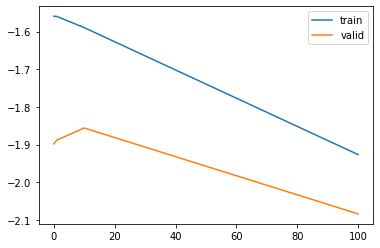

In [127]:
# Tunning alpha parameters for ridge model

alpha = 0.01,0.1,1,10,100
train=[]
valid=[]
a=[]

for x in alpha:
  result=cross_validate(Ridge(alpha=x),
                          X_train_sc,
                          y_train,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score = True)
  train.append(result['train_score'].mean())
  valid.append(result['test_score'].mean())
  a.append(x)

sns.lineplot(x=a,y=train,label='train')
sns.lineplot(x=a,y=valid,label='valid')
plt.show()

In [128]:
a[np.argmax(valid)]

10

In [129]:
# Declaring the optimized model for ridge

ridge_opt = Ridge(alpha=10)
ridge_opt.fit(X_train_sc, y_train)

Ridge(alpha=10)

In [130]:
# Chechking the optimized ridge performance

merg([regrp(ridge_opt, X_train_sc, y_train, 'train_rf_opt'),
     regrp(ridge_opt, X_test_sc, y_test, 'test_rf_opt')])

                    r2       mse      rmse       mae
train_rf_opt  0.305598  1.612823  1.269970  1.021540
test_rf_opt   0.137299  1.838494  1.355911  1.248701


## Random Forest

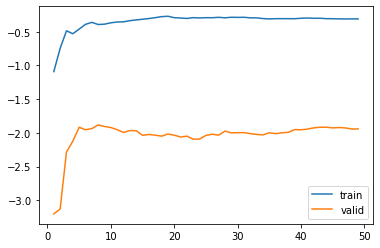

In [131]:
# Tunning n_estimators parameters for RF model

par = np.arange(1,50,1)
train = []
valid = []
a = []
for x in par:
    result = cross_validate(RandomForestRegressor(n_estimators=x, 
                                                  random_state=42),
                            X_train,
                            y_train,
                            scoring='neg_mean_squared_error',
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)
    
sns.lineplot(x = a, y=train, label='train')
sns.lineplot(x = a, y=valid, label='valid')
plt.show()

In [132]:
a[np.argmax(valid)]

8

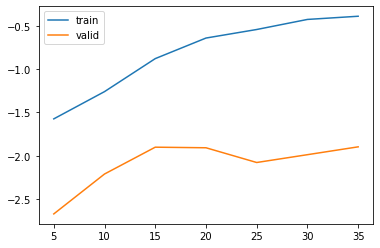

In [133]:
# Tunning max_samples parameters for RF model

par = np.arange(5,40,5)
train = []
valid = []
a = []
for x in par:
    result = cross_validate(RandomForestRegressor(n_estimators=8,
                                                 max_samples=x,
                                                  random_state=42),
                            X_train_sc,
                            y_train,
                            scoring='neg_mean_squared_error',
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)
    
sns.lineplot(x = a, y=train, label='train')
sns.lineplot(x = a, y=valid, label='valid')
plt.show()

In [134]:
a[np.argmax(valid)]

35

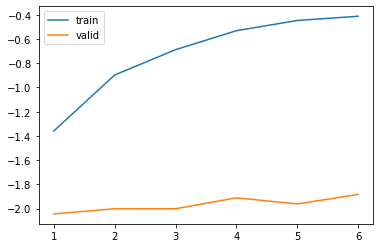

In [135]:
# Tunning max_depth parameters for RF model

par = np.arange(1,7,1)
train = []
valid = []
a = []
for x in par:
    result = cross_validate(RandomForestRegressor(n_estimators=8,
                                                 max_samples=35,
                                                 max_depth=x,
                                                  random_state=42),
                            X_train_sc,
                            y_train,
                            scoring='neg_mean_squared_error',
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)
    
sns.lineplot(x = a, y=train, label='train')
sns.lineplot(x = a, y=valid, label='valid')
plt.show()

In [136]:
a[np.argmax(valid)]

6

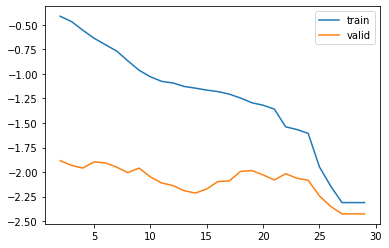

In [137]:
# Tunning min_samples_split parameters for RF model

par = np.arange(1,30,1)
train = []
valid = []
a = []
for x in par :
    result = cross_validate(RandomForestRegressor(n_estimators=8,
                                                 max_samples=35,
                                                 max_depth=6,
                                                 min_samples_split=x,
                                                  random_state=42),
                            X_train_sc,
                            y_train,
                            scoring='neg_mean_squared_error',
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)
    
sns.lineplot(x = a, y=train, label='train')
sns.lineplot(x = a, y=valid, label='valid')
plt.show()

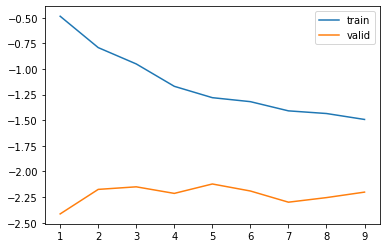

In [138]:
# Tunning min_samples_leaf parameters for RF model

par = np.arange(1,10,1)
train = []
valid = []
a = []
for x in par:
    np.random.seed(42)
    result = cross_validate(RandomForestRegressor(n_estimators=8,
                                                 max_samples=35,
                                                 max_depth=6,
                                                 min_samples_leaf=x),
                            X_train_sc,
                            y_train,
                            scoring='neg_mean_squared_error',
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)
    
sns.lineplot(x = a, y=train, label='train')
sns.lineplot(x = a, y=valid, label='valid')
plt.show()

In [139]:
a[np.argmax(valid)]

5

In [158]:
# Declaring the optimized model for Random Forest

rf_opt = RandomForestRegressor(n_estimators=8,
                                   max_samples=35,
                                   max_depth=6,
                                   min_samples_leaf=5,
                                   random_state=42)

In [159]:
# Fitting the optimized RF model

rf_opt.fit(X_train_sc, y_train)

RandomForestRegressor(max_depth=6, max_samples=35, min_samples_leaf=5,
                      n_estimators=8, random_state=42)

In [160]:
# Checking the the optimized RF model performance 

merg([regrp(rf_opt, X_train_sc, y_train, 'train_rf_opt'),
     regrp(rf_opt, X_test_sc, y_test, 'test_rf_opt')])

                    r2       mse      rmse       mae
train_rf_opt  0.442229  1.295483  1.138193  0.890323
test_rf_opt   0.046283  2.032457  1.425643  1.236558


## XGBoost

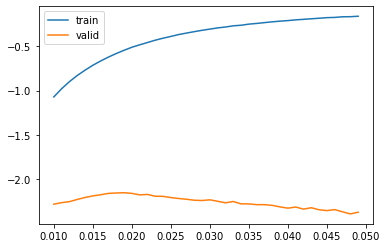

In [143]:
# Tunning learning_rate parameters for XGBoost model

par = np.arange(0.01,0.05,0.001)
train = []
valid = []
a = []
for x in par:
    result = cross_validate(XGBRegressor(learning_rate=x, 
                                         random_state=42,
                                         verbosity=0),
                            X_train_sc,
                            y_train,
                            scoring='neg_mean_squared_error',
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)
    
sns.lineplot(x = a, y=train, label='train')
sns.lineplot(x = a, y=valid, label='valid')
plt.show()

In [144]:
a[np.argmax(valid)]

0.018999999999999993

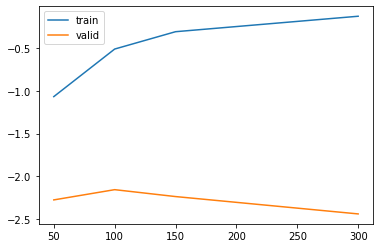

In [145]:
# Tunning n_estimators parameters for XGBoost model

par = 50,100,150,300
train = []
valid = []
a = []
for x in par:
    result = cross_validate(XGBRegressor(learning_rate=0.02,
                                         n_estimators=x,
                                         random_state=42,
                                         verbosity=0),
                            X_train_sc,
                            y_train,
                            scoring='neg_mean_squared_error',
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)
    
sns.lineplot(x = a, y=train, label='train')
sns.lineplot(x = a, y=valid, label='valid')
plt.show()

In [146]:
a[np.argmax(valid)]

100

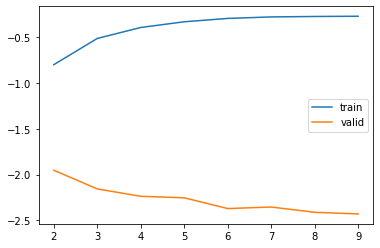

In [147]:
# Tunning max_depth parameters for XGBoost model

par = np.arange(2,10,1)
train = []
valid = []
a = []
for x in par:
    result = cross_validate(XGBRegressor(learning_rate=0.02,
                                         n_estimators=100,
                                         max_depth=x,
                                         random_state=42,
                                         verbosity=0),
                            X_train_sc,
                            y_train,
                            scoring='neg_mean_squared_error',
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)
    
sns.lineplot(x = a, y=train, label='train')
sns.lineplot(x = a, y=valid, label='valid')
plt.show()

In [148]:
a[np.argmax(valid)]

2

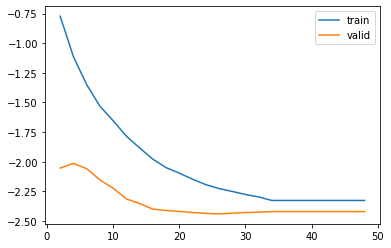

In [149]:
# Tunning gamma parameters for XGBoost model

par = np.arange(2,50,2)
train = []
valid = []
a = []
for x in par:
    result = cross_validate(XGBRegressor(learning_rate=0.02,
                                         n_estimators=100,
                                         random_state=42,
                                         verbosity=0,
                                        gamma=x),
                            X_train_sc,
                            y_train,
                            scoring='neg_mean_squared_error',
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)
    
sns.lineplot(x = a, y=train, label='train')
sns.lineplot(x = a, y=valid, label='valid')
plt.show()

In [150]:
a[np.argmax(valid)]

4

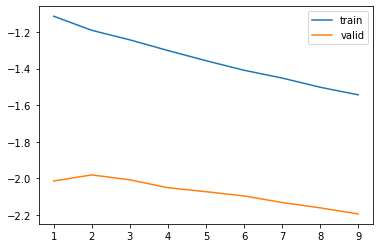

In [151]:
# Tunning reg_lambda parameters for XGBoost model

par = np.arange(1,10,1)
train = []
valid = []
a = []
for x in par:
    result = cross_validate(XGBRegressor(learning_rate=0.02,
                                         n_estimators=100,
                                         random_state=42,
                                         gamma=4,
                                         verbosity=0,
                                        reg_lambda=x),
                            X_train_sc,
                            y_train,
                            scoring='neg_mean_squared_error',
                            return_train_score= True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    a.append(x)
    
sns.lineplot(x = a, y=train, label='train')
sns.lineplot(x = a, y=valid, label='valid')
plt.show()

In [152]:
a[np.argmax(valid)]

2

In [161]:
# Declaring and fiting the optimized model for XGBoost

xgb_opt = XGBRegressor(verbosity = 0,
                           learning_rate = 0.02, 
                           n_estimators = 100, 
                           gamma = 4, 
                           random_state = 42, 
                           reg_lambda = 2)
xgb_opt.fit(X_train_sc, y_train)

XGBRegressor(gamma=4, learning_rate=0.02, random_state=42, reg_lambda=2,
             verbosity=0)

In [162]:
# Checking the optimized XGBoost model performance

merg([regrp(xgb_opt, X_train_sc, y_train, 'Train_xg_opt'),
      regrp(xgb_opt, X_test_sc, y_test, 'Test_xg_opt')])

                    r2       mse      rmse       mae
Train_xg_opt  0.496094  1.170376  1.081839  0.824188
Test_xg_opt   0.172426  1.763636  1.328019  1.105785


# Final Model

In [156]:
# The model performance before tuning

merg([regrp(linear,X_train_sc,y_train,'Train_linear'),
      regrp(linear,X_test_sc,y_test,'Test_linear'),
      regrp(ridge,X_train_sc,y_train,'Train_ridge'),
      regrp(ridge,X_test_sc,y_test,'Test_ridge'),
      regrp(rf,X_train_sc,y_train,'Train_rf'),
      regrp(rf,X_test_sc,y_test,'Test_rf'),
      regrp(xg,X_train_sc,y_train,'xg_test'),
      regrp(xg,X_test_sc,y_test,'xg_test')
            ])

                    r2       mse      rmse       mae
Train_linear  0.314003  1.593302  1.262261  1.013728
Test_linear   0.157589  1.795255  1.339871  1.241614
Train_ridge   0.313882  1.593583  1.262372  1.014788
Test_ridge    0.155286  1.800163  1.341702  1.242603
Train_rf      0.879734  0.279330  0.528517  0.386457
Test_rf      -0.128804  2.405584  1.550995  1.241767
xg_test       0.969243  0.071437  0.267277  0.205469
xg_test      -0.460076  3.111556  1.763960  1.398374


In [165]:
# The model performance after tuning

merg([regrp(ridge_opt,X_train_sc,y_train,'Train_ridge_opt'),
      regrp(ridge_opt,X_test_sc,y_test,'Test_ridge_opt'),
      regrp(rf_opt,X_train_sc,y_train,'Train_rf_opt'),
      regrp(rf_opt,X_test_sc,y_test,'Test_rf_opt'),
      regrp(xgb_opt,X_train_sc,y_train,'xg_train_opt'),
      regrp(xgb_opt,X_test_sc,y_test,'xg_test_opt')
            ])

                       r2       mse      rmse       mae
Train_ridge_opt  0.305598  1.612823  1.269970  1.021540
Test_ridge_opt   0.137299  1.838494  1.355911  1.248701
Train_rf_opt     0.442229  1.295483  1.138193  0.890323
Test_rf_opt      0.046283  2.032457  1.425643  1.236558
xg_train_opt     0.496094  1.170376  1.081839  0.824188
xg_test_opt      0.172426  1.763636  1.328019  1.105785


In [ ]:
# Conclusion : The optimized XGBoost has been choosen for the best model based on its performance compared to others
# For now, the XGBoost model cannot be implemented directly on the arcmap, so that the stand volume modeling has only been completed until the modeling stage. 

In [167]:
# The optimal parameters

xgb_opt.get_params

<bound method XGBModel.get_params of XGBRegressor(gamma=4, learning_rate=0.02, random_state=42, reg_lambda=2,
             verbosity=0)>